In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision
from models import TSN
from dataset_ucf import UCF_dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
data_path = "/home/vinh/cutting_video/jpegs_256"
class_label = "/home/vinh/cutting_video/ucfTrainTestlist/classInd.txt"
# preprocessing data 
action = {}
file1 = open(class_label, "r").readlines()
label_pre = [x.split('\n')[0] for x in file1]
label_pre = [x.split(' ') for x in label_pre]
for label in label_pre:
    action[label[1]] = int(label[0])

# get filename, label for train_set
all_names = []
label = []
folder_name = os.listdir(data_path)
test_sets = ["g01", "g02", "g03", "g04", "g05", "g06", "g07"]

for f in folder_name:
    if f[-7:-4] in test_sets:
        loc1 = f.find('v_')
        loc2 = f.find('_g')
        temp_act = f[(loc1+2) : loc2]
        label.append(action[temp_act])
        all_names.append(f)    
        
#splitting for test
X_train, X_val, y_train, y_val = train_test_split(all_names, label, stratify = label,  test_size = 0.05, random_state = 42)


In [3]:
# Transform
SIZE= 224
transform = torchvision.transforms.Compose([
                       torchvision.transforms.Resize((SIZE, SIZE)),
#                        torchvision.transforms.CenterCrop(),
                       torchvision.transforms.ToTensor(),
                       torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                   ])


test_set = UCF_dataset(data_path, X_val, y_val, num_segment= 3, transform = transform)

In [4]:
images, label = test_set.__getitem__(0)

In [5]:
images.size()

torch.Size([3, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


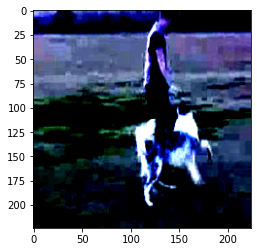

In [6]:
test_img = images[2]
print(test_img.size())
plt.imshow(test_img.permute(1,2,0))

In [12]:
model = TSN(num_class=101, num_segments=3, modality='RGB',
                 base_model='resnet101', new_length=None,
                 consensus_type='avg', before_softmax=True,
                 dropout=0.8,
                 crop_num=1, partial_bn=True)


Initializing TSN with base model: resnet101.
TSN Configurations:
    input_modality:     RGB
    num_segments:       3
    new_length:         1
    consensus_module:   avg
    dropout_ratio:      0.8
        


In [13]:
test_image = images.unsqueeze(0)
test_image = images.repeat(8, 1,1,1,1)
test_image.size()

torch.Size([8, 3, 3, 224, 224])

In [14]:
output = model(test_image)

In [15]:
print(output.size())

torch.Size([8, 101])


In [11]:
output[0]

tensor([-1.7773e-02, -4.1690e-02, -5.3379e-02, -1.3673e-02,  1.1434e-02,
        -1.1598e-02, -1.1504e-02, -1.6019e-02, -8.3821e-04, -4.4657e-02,
        -1.8677e-02, -1.0344e-03, -4.6062e-03, -1.1575e-03, -6.2703e-02,
        -1.9390e-02, -2.7988e-02,  1.7308e-04, -1.9980e-02,  3.5721e-02,
        -3.8182e-02, -6.9251e-02, -6.7137e-02,  8.8645e-03, -4.1990e-02,
         9.4968e-03, -2.9930e-02,  5.2948e-02, -6.2698e-05, -3.8190e-02,
         2.6068e-02, -2.8335e-02, -3.2921e-02,  2.0695e-02, -3.3829e-02,
         5.0237e-02,  4.9583e-03, -1.7748e-02,  4.2321e-02,  3.9825e-02,
         4.6332e-02,  3.6466e-02, -1.2632e-02, -7.7058e-02, -3.5952e-02,
         4.6424e-02,  1.0753e-02,  5.6107e-03, -1.4349e-03,  6.9731e-03,
        -1.5116e-02,  3.0476e-02, -4.3438e-02, -4.7094e-02, -4.9581e-02,
        -7.2378e-03,  2.2386e-02,  4.8865e-03,  2.9245e-02,  4.7030e-02,
        -5.6643e-02, -1.0275e-01,  3.4422e-02,  1.5488e-02,  4.9221e-02,
        -2.6397e-02, -2.7803e-02, -4.0854e-02, -5.1

In [16]:
output[0]

tensor([-0.0342, -0.0161,  0.0246,  0.0233, -0.0201,  0.0228, -0.0272, -0.0095,
        -0.0268, -0.0408, -0.0354, -0.0002,  0.0504,  0.0064, -0.0592,  0.0381,
         0.0075,  0.0545, -0.0272,  0.0354, -0.0436,  0.0559, -0.1183, -0.0082,
         0.0502, -0.0217, -0.0215,  0.0238,  0.0157, -0.0159,  0.0136, -0.0580,
         0.0375,  0.0242, -0.0054, -0.0539,  0.0011, -0.0035,  0.0040,  0.0636,
        -0.0114, -0.0095,  0.0087,  0.0233, -0.0409, -0.0107, -0.0344, -0.0508,
         0.0435,  0.0568, -0.0309,  0.0102,  0.0045,  0.0127, -0.0422,  0.0266,
        -0.0469, -0.0498,  0.0116,  0.0983, -0.0506, -0.0174, -0.0002, -0.0245,
         0.0495, -0.0491,  0.0043,  0.0355,  0.0503, -0.0289,  0.0073, -0.0403,
        -0.0042,  0.0054,  0.0827, -0.0663,  0.0008, -0.0522,  0.0277, -0.0087,
         0.0333, -0.0159,  0.0391,  0.0147, -0.0187, -0.0273,  0.0675, -0.0632,
        -0.0318, -0.0142,  0.0383, -0.0042, -0.0451, -0.0331,  0.0267,  0.0477,
         0.0036,  0.0779,  0.0149,  0.04